In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

from tqdm import tqdm

In [2]:
sst_normed = np.load('../CESM_data/CESM_SST_normalized_detrended.npy').astype(np.float32)
sss_normed = np.load('../CESM_data/CESM_SSS_normalized_detrended.npy').astype(np.float32)

In [3]:
sst_ensemble = np.mean(sst_normed,axis=(2,3))
sss_ensemble = np.mean(sss_normed,axis=(2,3))

In [4]:
tstep = 1032
lags = 50
sst_lagged_corr = np.zeros((42,lags))
sss_lagged_corr = np.zeros((42,lags))

for lead in range(lags):
    sst_lead = sst_ensemble[:,lead:]
    sst_lag = sst_ensemble[:,0:tstep-lead]
    sss_lag = sss_ensemble[:,0:tstep-lead]
    
    for ien in range(42):
        sst_lagged_corr[ien,lead] = np.corrcoef( sst_lead[ien,:],sst_lag[ien,:] )[0,1]
        sss_lagged_corr[ien,lead] = np.corrcoef( sst_lead[ien,:],sss_lag[ien,:] )[0,1]

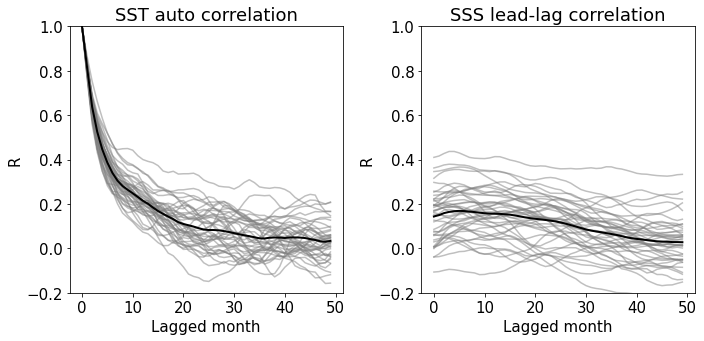

In [5]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})

lag_time = np.arange(0,lags,1)
plt.subplot(121)
for ien in range(42):
    plt.plot( lag_time, sst_lagged_corr[ien,:], color='gray', alpha=0.5 )

plt.plot(lag_time,np.mean(sst_lagged_corr,axis=0),color='k',linewidth=2)
plt.ylim([-0.2,1])
plt.xlabel('Lagged month')
plt.ylabel('R')
plt.title('SST auto correlation')

plt.subplot(122)
for ien in range(42):
    plt.plot( lag_time, sss_lagged_corr[ien,:], color='gray', alpha=0.5 )
plt.plot(lag_time,np.mean(sss_lagged_corr,axis=0),color='k',linewidth=2)
plt.ylim([-0.2,1])
plt.xlabel('Lagged month')
plt.ylabel('R')
plt.title('SSS lead-lag correlation')
plt.tight_layout()

#plt.savefig('SST_SSS_autocorrelation.pdf')
plt.show()